# Analytics - Product Quality

#### Date: 2022/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM:

##### Semester: 2022/01
##### Professor: Hilmer Neri

##### Members:

- Guilherme Leal
- João Pedro Soares
- Lucas Alexandre
- Matheus Estanislau
- Moacir Mascarenha
- Igor Silva de Paiva
- João Pedro Alves Machado
- Mário Vinícius
- Lucas Heler Lopes
- Pedro Siqueira
- Wildemberg Sales da Silva Junior

### LIBRARIES

In [1]:
# Deal with data
import pandas as pd
import json
from glob import glob
import os
import re

# Deal with visualization
import matplotlib.pyplot as plt

# Deal with time
import datetime

### GRAPH SETTINGS

In [2]:
fig = plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

### DATAFRAME SETTINGS

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

#### Replace your semester, project name, repository name, and the programming language extension

In [4]:
language = [['fga-eps-mds-2022-1-Alectrion-UserAPI', 'ts'],
            ['fga-eps-mds-2022-1-Alectrion-FrontEnd', 'ts'],
            ['fga-eps-mds-2022-1-Alectrion-EquipamentApi', 'ts']]

repos_language = {}

for item in language:
    repos_language[f"{item[0]}"] = item[1]

### SonarCloud

##### Path to the folder with all your jsons

In [5]:
jsons = glob('analytics-raw-data/*.json') # add your path here

In [6]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

def create_base_component_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)
        
    # Replace the UnB semester with yours.
    aux_df = df['filename'].str.split(r"fga-eps-mds-2022-1-(.*?)-(.*?)-(.*?)-(.*?)-v(.*?).json", expand=True)
    
    df['repository'] = aux_df[2]
    
    df['version'] = aux_df[5]

    df = df.sort_values(by=['repository', 'version'])
        
    return df

#### Create base component dataframe

In [7]:
base_component_df = create_base_component_df(jsons)

/tmp/ipykernel_34401/108625875.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
/tmp/ipykernel_34401/108625875.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
/tmp/ipykernel_34401/108625875.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
/tmp/ipykernel_34401/108625875.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
/tmp/ipykernel_34401/108625875.py:22: FutureWarning: The frame.append method is deprecated and w

In [8]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
48,test_errors,0,True,fga-eps-mds-2022-1-Alectrion-FrontEnd-09-20-20...,FrontEnd,.0.11.0
49,tests,12,NaN,fga-eps-mds-2022-1-Alectrion-FrontEnd-09-20-20...,FrontEnd,.0.11.0
50,test_execution_time,18041,NaN,fga-eps-mds-2022-1-Alectrion-FrontEnd-09-20-20...,FrontEnd,.0.11.0
51,test_failures,0,True,fga-eps-mds-2022-1-Alectrion-FrontEnd-09-20-20...,FrontEnd,.0.11.0
52,coverage,89.9,False,fga-eps-mds-2022-1-Alectrion-FrontEnd-09-20-20...,FrontEnd,.0.11.0
53,duplicated_lines_density,0.0,True,fga-eps-mds-2022-1-Alectrion-FrontEnd-09-20-20...,FrontEnd,.0.11.0
54,ncloc,1487,NaN,fga-eps-mds-2022-1-Alectrion-FrontEnd-09-20-20...,FrontEnd,.0.11.0
55,files,30,NaN,fga-eps-mds-2022-1-Alectrion-FrontEnd-09-20-20...,FrontEnd,.0.11.0
56,functions,59,NaN,fga-eps-mds-2022-1-Alectrion-FrontEnd-09-20-20...,FrontEnd,.0.11.0
57,comment_lines_density,1.8,False,fga-eps-mds-2022-1-Alectrion-FrontEnd-09-20-20...,FrontEnd,.0.11.0


#### Create dataframe per file

In [9]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'tests',
               'test_errors',
               'test_failures',
               'test_execution_time',
               'security_rating']

len(metric_list)

12

In [10]:
def get_files_df(df):
    
    files = df[df['qualifier'] == 'FIL'] 
    
    files = files.dropna(subset=['functions', 'complexity','comment_lines_density', 'duplicated_lines_density', 'coverage' ])
    
    return files

In [11]:
def get_dir_df(df):
    dirs = df[df["qualifier"] == "DIR"]     
        
    dirs = dirs.dropna(subset=['tests', 'test_errors','test_failures'])
    
    newdf = pd.to_numeric(dirs["tests"])
    
    max_value_index = newdf.idxmax()            
    
    return dirs.loc[max_value_index]

In [12]:
def get_uts_df(df):
    dirs = df[df['qualifier'] == 'UTS']     

    dirs = dirs.dropna(subset=['test_execution_time'])          
    
    return dirs

In [13]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        
        ncloc_value = 0;
        
        for valores in component['measures']:

            if valores['metric'] == 'ncloc':
                ncloc_value = float(valores['value'])
                break
    
        if (component['qualifier'] == 'FIL') & (ncloc_value > 0) or (component['qualifier'] == 'DIR') or (component['qualifier'] == 'UTS'):                       
            file_json.append(component)

    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    df2 = pd.DataFrame(columns = df_columns)
    df3 = pd.DataFrame(columns = df_columns)
    
    
    for file in json:
        try:
                if file['qualifier'] == 'FIL' and file['language'] == language_extension:
                    for measure in file['measures']:
                        df.at[file['path'], measure['metric']] = measure['value']

                    df['qualifier'] = file['qualifier'] 

                elif file['qualifier'] == 'UTS':  
                    for measure in file['measures']:
                        df3.at[file['path'], measure['metric']] = measure['value']

                    df3['qualifier'] = file['qualifier'] 
                elif file['qualifier'] == 'DIR':
                    for measure in file['measures']:
                        df2.at[file['path'], measure['metric']] = measure['value']
                    df2['qualifier'] = file['qualifier'] 
        except:
            pass

    df.reset_index(inplace = True)
    df2.reset_index(inplace = True)
    df3.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)
    df2 = df2.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)
    df3 = df3.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    dfFinal = pd.concat([df,df2,df3], axis=0)

    return dfFinal

def create_file_df(json_list):
    
    df = pd.DataFrame()
    dfDir = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)
                        
        file_name = os.path.basename(i)

        file_repository = re.split(r'-(\d+-\d+-\d+-\d+-\d+-\d+)-v(.*?).json', file_name)[0]

        file_language = repos_language[f"{file_repository}"]

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = file_language)
        
        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)
        
    # Replace the UnB semester with yours.
    
    aux_df = df['filename'].str.split(r"-(\d+-\d+-\d+-\d+-\d+-\d+)-v(.*?).json", expand=True)

    df['repository'] = aux_df[0]

    df['version'] = aux_df[2]

    df = df.sort_values(by=['version'])
    
    return df

In [14]:
file_component_df = create_file_df(jsons)
file_component_df.repository.unique()

/tmp/ipykernel_34401/3038128456.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
/tmp/ipykernel_34401/3038128456.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
/tmp/ipykernel_34401/3038128456.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
/tmp/ipykernel_34401/3038128456.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
/tmp/ipykernel_34401/3038128456.py:80: FutureWarning: The frame.append method is deprecated 

array(['fga-eps-mds-2022-1-Alectrion-FrontEnd',
       'fga-eps-mds-2022-1-Alectrion-UserAPI'], dtype=object)

#### Removing NaN

In [15]:
#file_component_df = file_component_df.dropna(subset=['functions', 'complexity','comment_lines_density', 'duplicated_lines_density', 'coverage' ])

        ### Create dataframe per repository

In [16]:
# Example. You must replace repo1, repo1,..., for your repository's names

repo1_df = file_component_df[file_component_df['repository'] == 'fga-eps-mds-2022-1-Alectrion-UserAPI']
repo2_df = file_component_df[file_component_df['repository'] == 'fga-eps-mds-2022-1-Alectrion-FrontEnd']
#repo3_df = file_component_df[file_component_df['repository'] == 'fga-eps-mds-2022-1-Alectrion-EquipamentApi']
...

Ellipsis

In [17]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        n = 0
        # try to cast the current ncloc value to int, if the value is NaN/Null, consider it as zero.
        try:
            n = int(each)
        except ValueError:
            n = 0
        ncloc += n

    return ncloc

### Measure calculations according Q-Rapids quality model

# Quality Aspect - Maintainability
## Factor - Code Quality

##### COMPLEXITY

In [18]:
def m1(df):

    files_df = get_files_df(df)
    density_non_complex_files = 0
    try:
        density_non_complex_files = len(files_df[(files_df['complexity'].astype(float) /
                                              files_df['functions'].astype(float)) < 10]) / len(files_df)
    except ZeroDivisionError:
        pass
    
    return density_non_complex_files

##### COMMENTS

In [19]:
def m2(df):

    files_df = get_files_df(df)
    density_comment_files = 0
    try:
        density_comment_files = len(files_df[(files_df['comment_lines_density'].astype(float) > 10) &
                                         (files_df['comment_lines_density'].astype(float) < 30)]) / len(files_df)
    except ZeroDivisionError:
        pass
    
    return density_comment_files

##### DUPLICATIONS

In [20]:
def m3(df):
    
    files_df = get_files_df(df)
    duplication = 0
    
    try:
        duplication = len(files_df[(files_df['duplicated_lines_density'].astype(float) < 5)])/len(files_df)
    except ZeroDivisionError:
        pass
        
    return duplication

# Quality Aspect - Reliability
## Factor - Testing Status

##### Passed tests

In [21]:
def m4(df):
    
    cont = 0
    dir_df = get_dir_df(df)
    passed_tests = 0
    
    try:
        passed_tests = (float(dir_df['tests']) - (float(dir_df['test_errors']) + float(dir_df['test_failures']))) /\
                   float(dir_df['tests'])
    except ValueError:
        cont+=1
        
    return passed_tests

##### Fast test builds

In [22]:
def m5(df):

    dir_df = get_uts_df(df)
    density_fast_test_builds = 0
    
    try:
        density_fast_test_builds = len(dir_df[(dir_df['test_execution_time'].astype(float)) < 300000]) /\
                               len(dir_df['test_execution_time'].astype(float))
    except ZeroDivisionError:
        pass
    
    return density_fast_test_builds

##### Test coverage

In [23]:
def m6(df):

    files_df = get_files_df(df)
    density_test_coverage = 0
    try:
        density_test_coverage = len(files_df[(files_df['coverage'].astype(float) > 60)]) / len(files_df)
    except ZeroDivisionError:
        pass
    
    return density_test_coverage

### Calculate m1, m2, m3, m4, m5 and m6 for each repository

In [24]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    m4_list = []
    m5_list = []
    m6_list = []

    ncloc_list = []
    repository_list = []
    version_list = []
    
    for version in version_vec:

        version_df = df[df['version'] == version]
        
        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        m4_list.append(m4(version_df))
        m5_list.append(m5(version_df))
        m6_list.append(m6(version_df))

        ncloc_list.append(_ncloc(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'm4': m4_list,
                               'm5': m5_list,
                               'm6': m6_list,
                               'repository': repository_list, 
                               'version': version_list,
                               'ncloc': ncloc_list})
      
    return metrics_df

In [25]:
repo1 = create_metrics_df(repo1_df)
repo2 = create_metrics_df(repo2_df)
#repo3 = create_metrics_df(repo3_df)

...

Ellipsis

### Data visualization

- You must do this for each of your repositories

In [26]:
#Alectrion UserAPI
repo1

,m1,m2,m3,m4,m5,m6,repository,version,ncloc
0,0.904762,0.0,1.0,1.0,1.0,0.476190,fga-eps-mds-2022-1-Alectrion-UserAPI,.0.14.0,2495
1,0.925926,0.0,1.0,1.0,1.0,0.481481,fga-eps-mds-2022-1-Alectrion-UserAPI,.0.15.0,3191
2,0.935484,0.0,1.0,1.0,1.0,0.419355,fga-eps-mds-2022-1-Alectrion-UserAPI,.0.17.0,3462
3,0.935484,0.0,1.0,1.0,1.0,0.516129,fga-eps-mds-2022-1-Alectrion-UserAPI,.0.19.0,3514
4,0.833333,0.0,1.0,1.0,1.0,0.444444,fga-eps-mds-2022-1-Alectrion-UserAPI,.0.4.0,1810
5,0.882353,0.0,1.0,1.0,1.0,0.529412,fga-eps-mds-2022-1-Alectrion-UserAPI,.0.5.0,1885
6,0.882353,0.0,1.0,1.0,1.0,0.529412,fga-eps-mds-2022-1-Alectrion-UserAPI,.0.7.0,1885
7,0.904762,0.0,1.0,1.0,1.0,0.476190,fga-eps-mds-2022-1-Alectrion-UserAPI,.0.9.0,2237


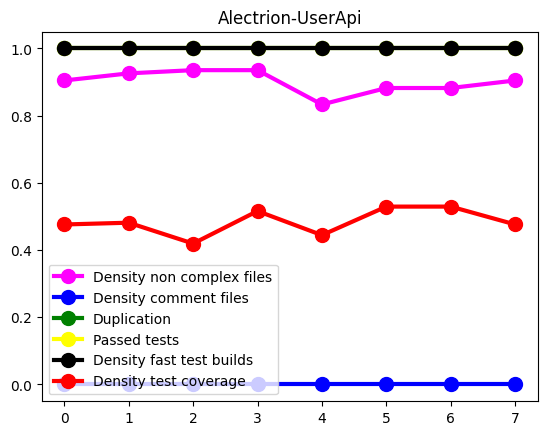

In [27]:
plt.title('Alectrion-UserApi')
plt.plot(repo1['m1'], linewidth=3, marker='o', markersize=10, color="magenta", label="Density non complex files")
plt.plot(repo1['m2'], linewidth=3, marker='o', markersize=10, color="blue", label="Density comment files")
plt.plot(repo1['m3'], linewidth=3, marker='o', markersize=10, color="green", label="Duplication")
plt.plot(repo1['m4'], linewidth=3, marker='o', markersize=10, color="yellow", label="Passed tests")
plt.plot(repo1['m5'], linewidth=3, marker='o', markersize=10, color="black", label="Density fast test builds")
plt.plot(repo1['m6'], linewidth=3, marker='o', markersize=10, color="red", label="Density test coverage")
plt.legend()

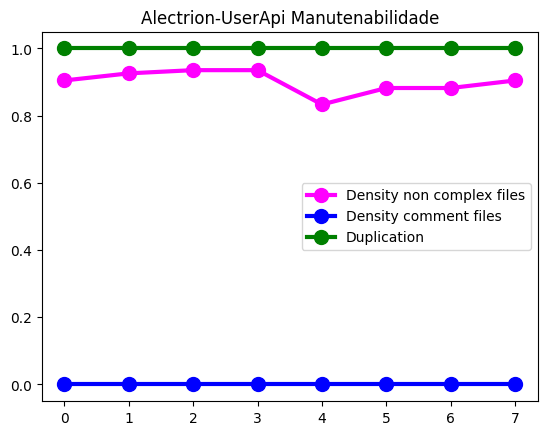

In [28]:
plt.title('Alectrion-UserApi Manutenabilidade')
plt.plot(repo1['m1'], linewidth=3, marker='o', markersize=10, color="magenta", label="Density non complex files")
plt.plot(repo1['m2'], linewidth=3, marker='o', markersize=10, color="blue", label="Density comment files")
plt.plot(repo1['m3'], linewidth=3, marker='o', markersize=10, color="green", label="Duplication")
plt.legend()
pfname="data/manutenabilidade"
plt.savefig(pfname)

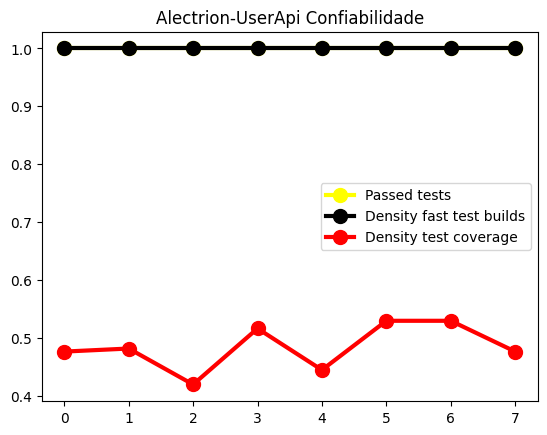

In [29]:
plt.title('Alectrion-UserApi Confiabilidade')
plt.plot(repo1['m4'], linewidth=3, marker='o', markersize=10, color="yellow", label="Passed tests")
plt.plot(repo1['m5'], linewidth=3, marker='o', markersize=10, color="black", label="Density fast test builds")
plt.plot(repo1['m6'], linewidth=3, marker='o', markersize=10, color="red", label="Density test coverage")
plt.legend()
pfname="data/confiabilidade"
plt.savefig(pfname)

In [30]:
#Alectrion FrontEnd
repo2

,m1,m2,m3,m4,m5,m6,repository,version,ncloc
0,0.896552,0.000000,1.000000,1.0,1.0,0.965517,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.11.0,5948
1,0.900000,0.050000,1.000000,1.0,1.0,0.850000,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.13.0,4224
2,0.900000,0.050000,1.000000,1.0,1.0,0.850000,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.16.0,4216
3,0.869565,0.000000,1.000000,1.0,1.0,1.000000,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.17.0,4940
4,0.875000,0.000000,1.000000,1.0,1.0,1.000000,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.21.0,5100
5,0.909091,0.000000,1.000000,1.0,1.0,0.848485,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.27.0,8440
6,0.921053,0.000000,0.947368,1.0,1.0,0.736842,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.28.0,10596
7,0.913043,0.000000,0.934783,1.0,1.0,0.891304,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.36.0,17068
8,0.833333,0.000000,1.000000,1.0,1.0,1.000000,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.4.0,1161
9,0.882353,0.058824,1.000000,1.0,1.0,0.941176,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.8.0,3792


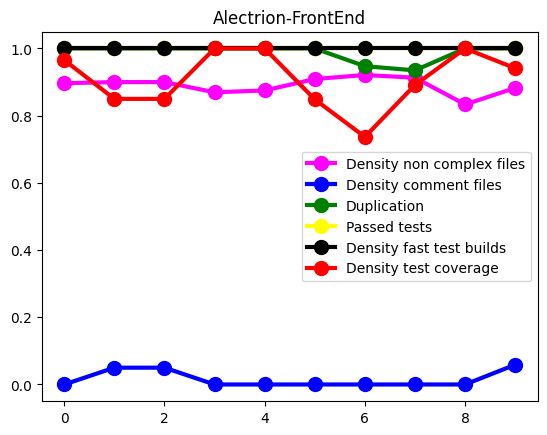

In [31]:
plt.title('Alectrion-FrontEnd')
plt.plot(repo2['m1'], linewidth=3, marker='o', markersize=10, color="magenta", label="Density non complex files")
plt.plot(repo2['m2'], linewidth=3, marker='o', markersize=10, color="blue", label="Density comment files")
plt.plot(repo2['m3'], linewidth=3, marker='o', markersize=10, color="green", label="Duplication")
plt.plot(repo2['m4'], linewidth=3, marker='o', markersize=10, color="yellow", label="Passed tests")
plt.plot(repo2['m5'], linewidth=3, marker='o', markersize=10, color="black", label="Density fast test builds")
plt.plot(repo2['m6'], linewidth=3, marker='o', markersize=10, color="red", label="Density test coverage")
plt.legend()

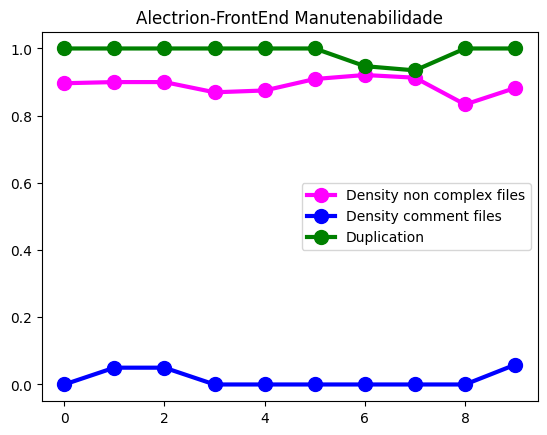

In [32]:
plt.title('Alectrion-FrontEnd Manutenabilidade')
plt.plot(repo2['m1'], linewidth=3, marker='o', markersize=10, color="magenta", label="Density non complex files")
plt.plot(repo2['m2'], linewidth=3, marker='o', markersize=10, color="blue", label="Density comment files")
plt.plot(repo2['m3'], linewidth=3, marker='o', markersize=10, color="green", label="Duplication")
plt.legend()
pfname="data/manutenabilidade-front"
plt.savefig(pfname)

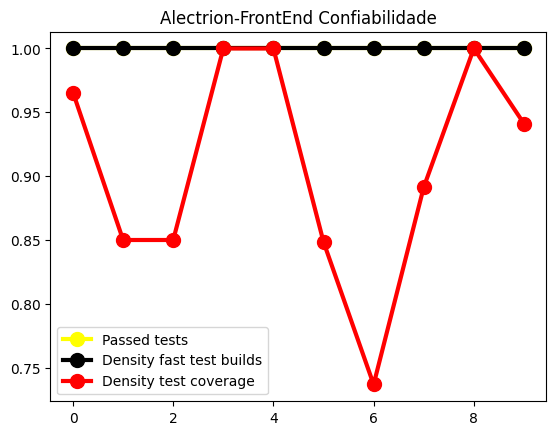

In [33]:
plt.title('Alectrion-FrontEnd Confiabilidade')
plt.plot(repo2['m4'], linewidth=3, marker='o', markersize=10, color="yellow", label="Passed tests")
plt.plot(repo2['m5'], linewidth=3, marker='o', markersize=10, color="black", label="Density fast test builds")
plt.plot(repo2['m6'], linewidth=3, marker='o', markersize=10, color="red", label="Density test coverage")
plt.legend()
pfname="data/confiabilidade-front"
plt.savefig(pfname)

In [34]:
#Alectrion EquipamentAPI
#repo3

In [35]:
#plt.title('Alectrion-EquipamentApi')
#plt.plot(repo3['m1'], linewidth=3, marker='o', markersize=10, color="magenta", label="Density non complex files")
#plt.plot(repo3['m2'], linewidth=3, marker='o', markersize=10, color="blue", label="Density comment files")
#plt.plot(repo3['m3'], linewidth=3, marker='o', markersize=10, color="green", label="Duplication")
#plt.plot(repo3['m4'], linewidth=3, marker='o', markersize=10, color="yellow", label="Passed tests")
#plt.plot(repo3['m5'], linewidth=3, marker='o', markersize=10, color="black", label="Density fast test builds")
#plt.plot(repo3['m6'], linewidth=3, marker='o', markersize=10, color="red", label="Density test coverage")
#plt.legend()

### Quality factor and aspect aggregation

- You must do this for each of your repositories

In [36]:
psc1 = 1
psc2 = 1
pc1 = 0.5
pc2 = 0.5
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33
pm4 = 0.25
pm5 = 0.25
pm6 = 0.5

repo1['code_quality'] = ((repo1['m1']*pm1) + (repo1['m2']*pm2) + (repo1['m3']*pm3)) * psc1
repo2['code_quality'] = ((repo2['m1']*pm1) + (repo2['m2']*pm2) + (repo2['m3']*pm3)) * psc1
#repo3['code_quality'] = ((repo3['m1']*pm1) + (repo3['m2']*pm2) + (repo3['m3']*pm3)) * psc1
...

repo1['testing_status'] = ((repo1['m4']*pm4) + (repo1['m5']*pm5) + (repo1['m6']*pm6)) * psc2
repo2['testing_status'] = ((repo2['m4']*pm4) + (repo2['m5']*pm5) + (repo2['m6']*pm6)) * psc2
#repo3['testing_status'] = ((repo3['m4']*pm4) + (repo3['m5']*pm5) + (repo3['m6']*pm6)) * psc2
...

Ellipsis

Ellipsis

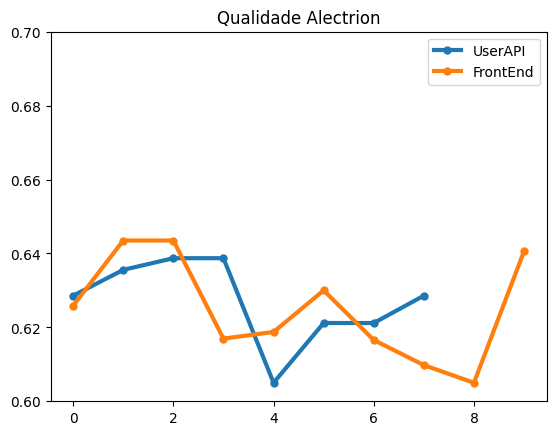

In [37]:
plt.title('Qualidade Alectrion')
plt.plot(repo1['code_quality'], linewidth=3, marker='o', markersize=5, label="UserAPI")
plt.plot(repo2['code_quality'], linewidth=3, marker='o', markersize=5, label="FrontEnd")
#plt.plot(repo3['code_quality'], linewidth=3, marker='o', markersize=5, label="EquipamentAPI")
plt.legend()
plt.ylim([0.6,0.7])
pfname="data/qualidade"
plt.savefig(pfname)
...

Ellipsis

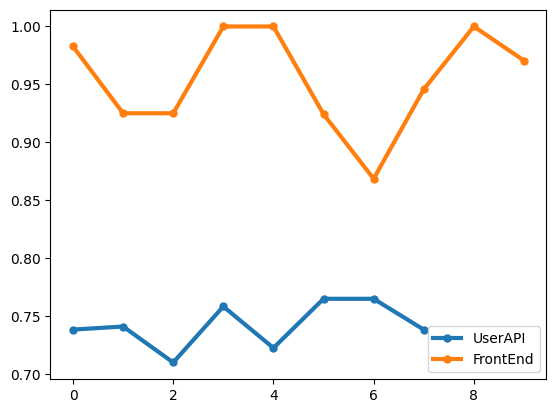

In [38]:

plt.plot(repo1['testing_status'], linewidth=3, marker='o', markersize=5, label="UserAPI")
plt.plot(repo2['testing_status'], linewidth=3, marker='o', markersize=5, label="FrontEnd")
#plt.plot(repo3['testing_status'], linewidth=3, marker='o', markersize=5, label="EquipamentAPI")
plt.legend()
...


In [39]:
repo1['Maintainability'] = repo1['code_quality'] * pc1
repo1['Reliability'] = repo1['testing_status'] * pc2
repo1['total'] = repo1['Maintainability'] + repo1['Reliability']

repo2['Maintainability'] = repo2['code_quality'] * pc1
repo2['Reliability'] = repo2['testing_status'] * pc2
repo2['total'] = repo2['Maintainability'] + repo2['Reliability']

#repo3['Maintainability'] = repo3['code_quality'] * pc1
#repo3['Reliability'] = repo3['testing_status'] * pc2
#repo3['total'] = repo3['Maintainability'] + repo3['Reliability']
...

Ellipsis

In [40]:
#Alectrion USERAPI
repo1

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,Maintainability,Reliability,total
0,0.904762,0.0,1.0,1.0,1.0,0.476190,fga-eps-mds-2022-1-Alectrion-UserAPI,.0.14.0,2495,0.628571,0.738095,0.314286,0.369048,0.683333
1,0.925926,0.0,1.0,1.0,1.0,0.481481,fga-eps-mds-2022-1-Alectrion-UserAPI,.0.15.0,3191,0.635556,0.740741,0.317778,0.370370,0.688148
2,0.935484,0.0,1.0,1.0,1.0,0.419355,fga-eps-mds-2022-1-Alectrion-UserAPI,.0.17.0,3462,0.638710,0.709677,0.319355,0.354839,0.674194
3,0.935484,0.0,1.0,1.0,1.0,0.516129,fga-eps-mds-2022-1-Alectrion-UserAPI,.0.19.0,3514,0.638710,0.758065,0.319355,0.379032,0.698387
4,0.833333,0.0,1.0,1.0,1.0,0.444444,fga-eps-mds-2022-1-Alectrion-UserAPI,.0.4.0,1810,0.605000,0.722222,0.302500,0.361111,0.663611
5,0.882353,0.0,1.0,1.0,1.0,0.529412,fga-eps-mds-2022-1-Alectrion-UserAPI,.0.5.0,1885,0.621176,0.764706,0.310588,0.382353,0.692941
6,0.882353,0.0,1.0,1.0,1.0,0.529412,fga-eps-mds-2022-1-Alectrion-UserAPI,.0.7.0,1885,0.621176,0.764706,0.310588,0.382353,0.692941
7,0.904762,0.0,1.0,1.0,1.0,0.476190,fga-eps-mds-2022-1-Alectrion-UserAPI,.0.9.0,2237,0.628571,0.738095,0.314286,0.369048,0.683333


(0.1, 1.1)

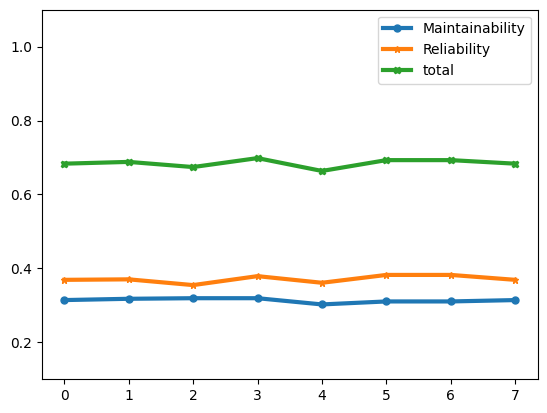

In [41]:
plt.plot(repo1['Maintainability'], linewidth=3, marker='o', markersize=5, label="Maintainability")
plt.plot(repo1['Reliability'], linewidth=3, marker='*', markersize=5, label="Reliability")
plt.plot(repo1['total'], linewidth=3, marker='X', markersize=5, label="total")
plt.legend()
plt.ylim(0.1,1.1)

In [42]:
#Alectrion FrontEnd
repo2

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,Maintainability,Reliability,total
0,0.896552,0.000000,1.000000,1.0,1.0,0.965517,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.11.0,5948,0.625862,0.982759,0.312931,0.491379,0.804310
1,0.900000,0.050000,1.000000,1.0,1.0,0.850000,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.13.0,4224,0.643500,0.925000,0.321750,0.462500,0.784250
2,0.900000,0.050000,1.000000,1.0,1.0,0.850000,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.16.0,4216,0.643500,0.925000,0.321750,0.462500,0.784250
3,0.869565,0.000000,1.000000,1.0,1.0,1.000000,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.17.0,4940,0.616957,1.000000,0.308478,0.500000,0.808478
4,0.875000,0.000000,1.000000,1.0,1.0,1.000000,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.21.0,5100,0.618750,1.000000,0.309375,0.500000,0.809375
5,0.909091,0.000000,1.000000,1.0,1.0,0.848485,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.27.0,8440,0.630000,0.924242,0.315000,0.462121,0.777121
6,0.921053,0.000000,0.947368,1.0,1.0,0.736842,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.28.0,10596,0.616579,0.868421,0.308289,0.434211,0.742500
7,0.913043,0.000000,0.934783,1.0,1.0,0.891304,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.36.0,17068,0.609783,0.945652,0.304891,0.472826,0.777717
8,0.833333,0.000000,1.000000,1.0,1.0,1.000000,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.4.0,1161,0.605000,1.000000,0.302500,0.500000,0.802500
9,0.882353,0.058824,1.000000,1.0,1.0,0.941176,fga-eps-mds-2022-1-Alectrion-FrontEnd,.0.8.0,3792,0.640588,0.970588,0.320294,0.485294,0.805588


Ellipsis

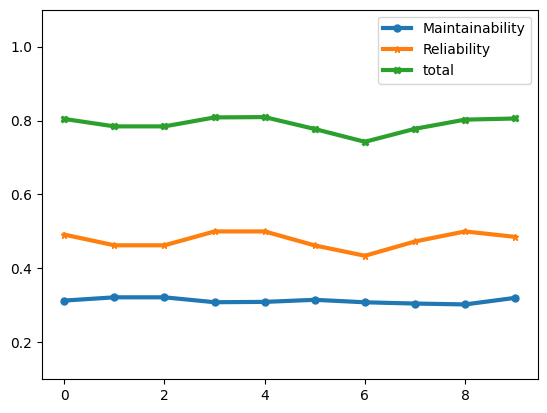

In [43]:
plt.plot(repo2['Maintainability'], linewidth=3, marker='o', markersize=5, label="Maintainability")
plt.plot(repo2['Reliability'], linewidth=3, marker='*', markersize=5, label="Reliability")
plt.plot(repo2['total'], linewidth=3, marker='X', markersize=5, label="total")
plt.legend()
plt.ylim(0.1,1.1)
...

In [44]:
#Alectrion EquipamentAPI
#repo3

In [45]:
#plt.plot(repo3['Maintainability'], linewidth=3, marker='o', markersize=5, label="Maintainability")
#plt.plot(repo3['Reliability'], linewidth=3, marker='*', markersize=5, label="Reliability")
#plt.plot(repo3['total'], linewidth=3, marker='X', markersize=5, label="total")
#plt.legend()
#plt.ylim(0.1,1.1)
...

Ellipsis

### You must do the total plot and the statics analysis for the repository with more versions.

In [46]:
# Building descriptive statistics dataframe. You must replace YourRepoName for your repository name with more product versions.

metrics_df = pd.concat([repo1, repo2], ignore_index=True)

more_versions_repo = metrics_df[metrics_df['repository'] == 'fga-eps-mds-2022-1-Alectrion-UserAPI']

def get_characteristc_stats(repo_series):
    return {
        'mean': repo_series.mean(),
        'mode': repo_series.mode(),
        'median': repo_series.median(),
        'std': repo_series.std(),
        'var': repo_series.var(),
        'min': repo_series.min(),
        'max': repo_series.max()
    }

maintainability_stats = pd.DataFrame(get_characteristc_stats(more_versions_repo["Maintainability"]),
                                     columns=['mean', 'mode', 'median', 'std', 'var', 'min', 'max'])

reliability_stats = pd.DataFrame(get_characteristc_stats(more_versions_repo["Reliability"]),
                                 columns=['mean', 'mode', 'median', 'std', 'var', 'min', 'max'])

In [47]:
print(maintainability_stats)

       mean      mode    median       std       var     min       max
0  0.313592  0.310588  0.314286  0.005682  0.000032  0.3025  0.319355
1  0.313592  0.314286  0.314286  0.005682  0.000032  0.3025  0.319355
2  0.313592  0.319355  0.314286  0.005682  0.000032  0.3025  0.319355


In [48]:
print(reliability_stats)

       mean      mode    median       std       var       min       max
0  0.371019  0.369048  0.369709  0.009923  0.000098  0.354839  0.382353
1  0.371019  0.382353  0.369709  0.009923  0.000098  0.354839  0.382353


### Plotting the aggregated quality characteristic indicator

{'whiskers': [<matplotlib.lines.Line2D at 0x7f150fa51a50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f150fa7ef80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f150fa538e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f150fa7ff10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f150fa7ff40>,
 'means': []}

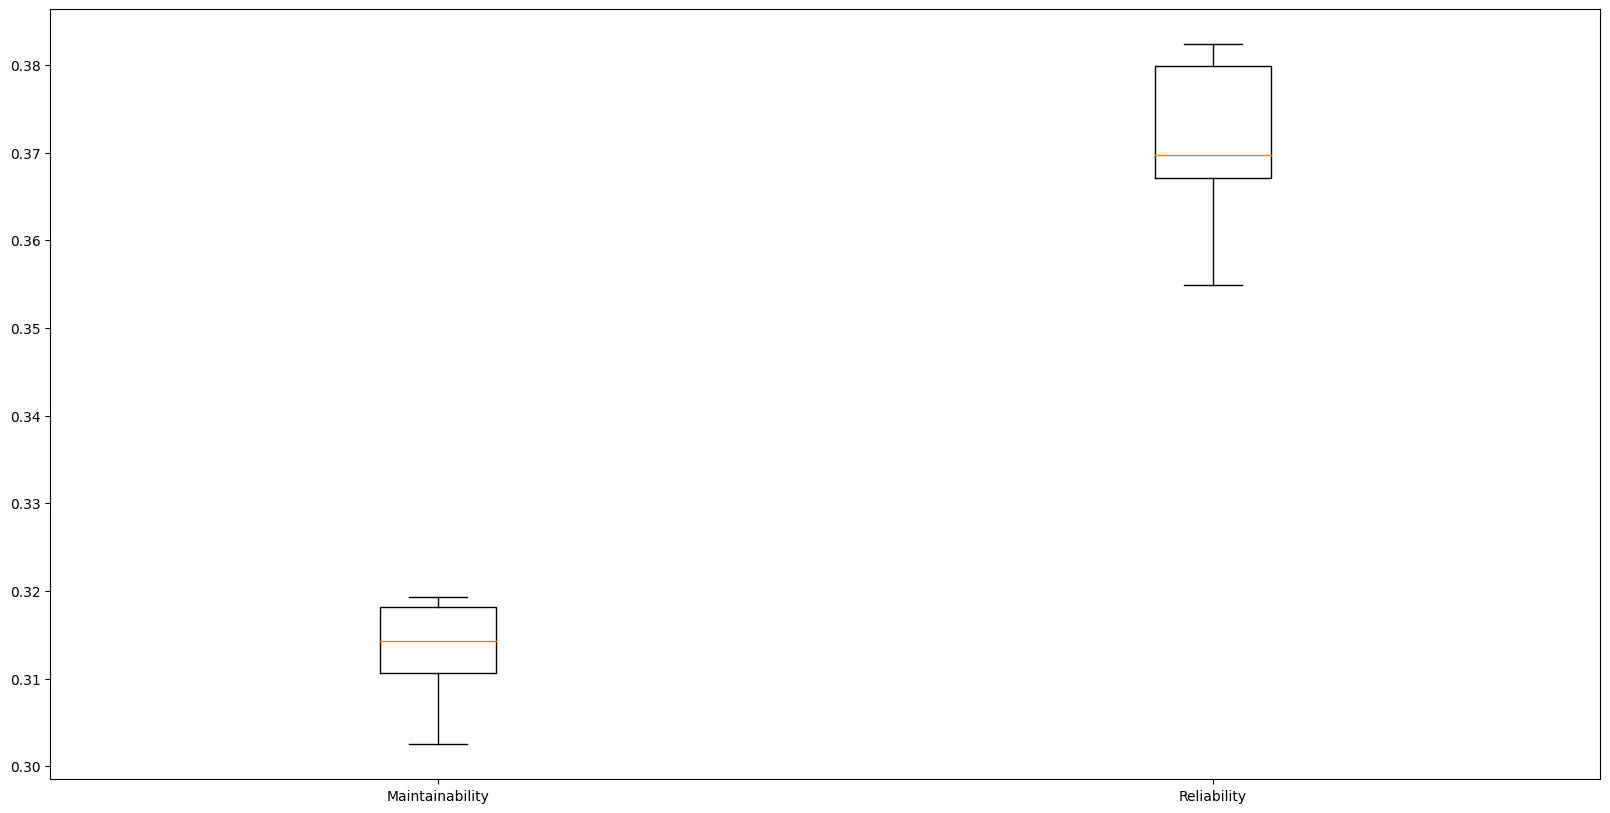

In [49]:
plt.figure(figsize=(20, 10))

# boxplot
plt.boxplot([more_versions_repo['Maintainability'], more_versions_repo['Reliability']],
labels=['Maintainability', 'Reliability'])

### Plotting the aggregated repository quality indicator

(0.1, 1.0)

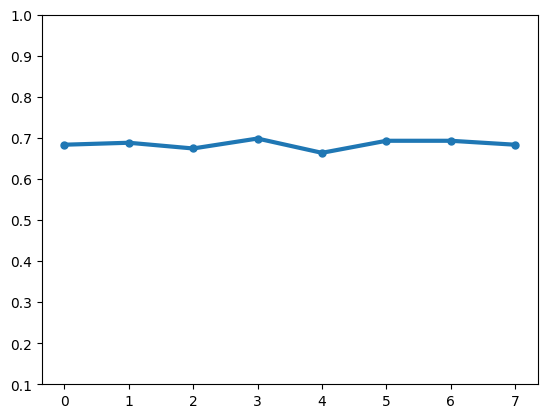

In [50]:
plt.plot(more_versions_repo['total'], linewidth=3, marker='o', markersize=5)

plt.ylim(.1,1)

In [51]:
# DATE FORMAT: MM-DD-YYYY-HH:MM:SS
currentDateTime = datetime.datetime.now().strftime("%m-%d-%Y-%H:%M:%S")

metrics_df.to_excel('data/fga-eps-mds-2022-1-AlectrionFrontEnd-{}.xlsx'.format(currentDateTime), index = False)
metrics_df.to_csv('data/fga-eps-mds-2022-1-AlectrionFrontEnd-{}.csv'.format(currentDateTime), index = False)

###  Perguntas

#### 1) Qual é o microsserviço de backend que apresenta o pior indicador de manutenibilidade e o que foi feito por seu time para melhorá-lo? 

    O Alectrion-UserApi apresenta o pior indicador de manutenibilidade, segundo a análise do notebook, mesmo apresentando bons indicativos de manutenibilidade, a pior indicada é a complexidade ciclomática.  

    As métricas de densidade de comentários e duplicações apresentam os valores ideais para essas métricas. A complexidade de arquivos não complexos apresentam indicativos bons, porém é o único ponto a ser melhorado no serviço de userApi. Aplicamos alguns princípios do SOLID que visam facilitar o entendimento do código, principalmente o Princípio da responsabilidade única (Single Responsability Principle) que visa reduzir as responsabilidades das classes apenas para o domínio de sua operação e o Princípio da segregação de interfaces (Interface Segregation Principle) que visa que uma classe não deve ser obrigada a implementar métodos que ela não irá utilizar e também focamos na reutilização de código.


#### 2) No microsserviço que apresenta o pior indicador de confiabilidade, mostre qual(is) o(s) módulos/arquivos mais críticos e explique como seu time tratou esse problema. 


Segundo os gráficos de confiabilidade apresentados nos microsserviços, o UserApi é o microsserviço com menor confiabilidade, pois a cobertura de teste no projeto ficou abaixo de 60%.
A cobertura de teste em vários momentos do projeto ficou abaixo de 60% por conta de uma falha na configuração da coleta de cobertura, pois arquivos que não eram necessários foram testados (repository, entity, etc).
Na análise nenhum teste apresentou falha, pois ao acontecer uma falha no CI não será enviado a análise para o sonar.
Para aumentar a confiabilidade fizemos testes para arquivos com menor cobertura de testes


#### 3) Explique o comportamento da qualidade do produto, observada durante o desenvolvimento do projeto relacionado ao seu time.


Através das métricas colhidas foi possível observar que a qualidade do produto apresentou pouca variação durante o desenvolvimento. A maior variação encontrada aconteceu por conta da equipe no final da disciplina priorizar as funcionalidades para entrega do MVP, flexibilizando a cobertura de testes visando disponibilizar a funcionalidade para o cliente.

Observações: 
O microsserviço api-gateway não foi incluído nas métricas visto que sua funcionalidade principal é o redirecionamento dos fluxos de requisições para os demais microsserviços e ao longo do semestre foram feitas apenas correções no código fonte.

O microsserviço Alectrion-EquipamentApi não foi utilizado na análise do notebook, pois as métricas colhidas acarretam erros no processamento no analytics. Inviabilizando a comparação dos resultados com os outros microsserviços.






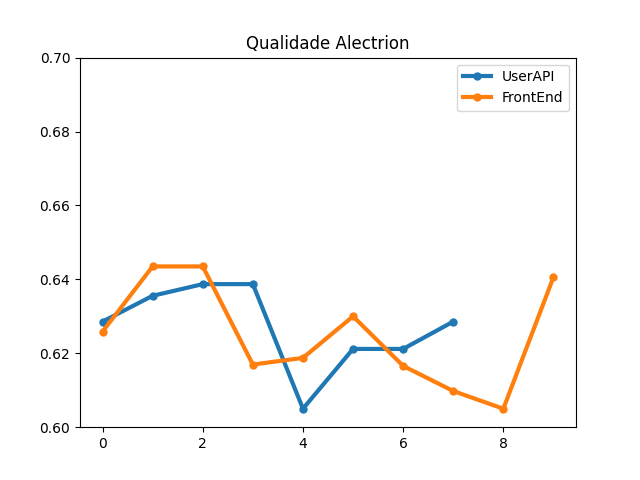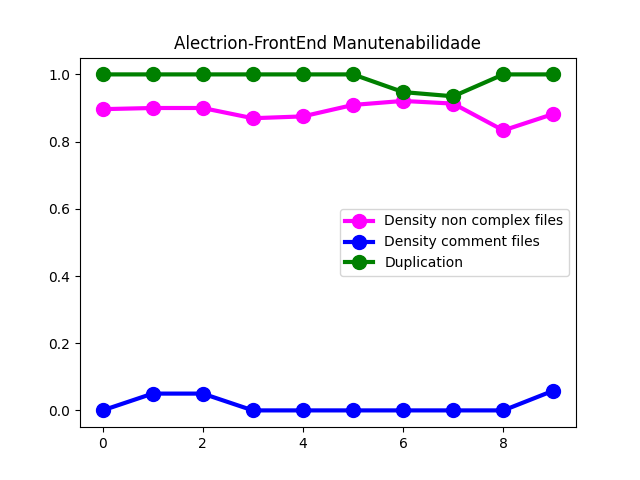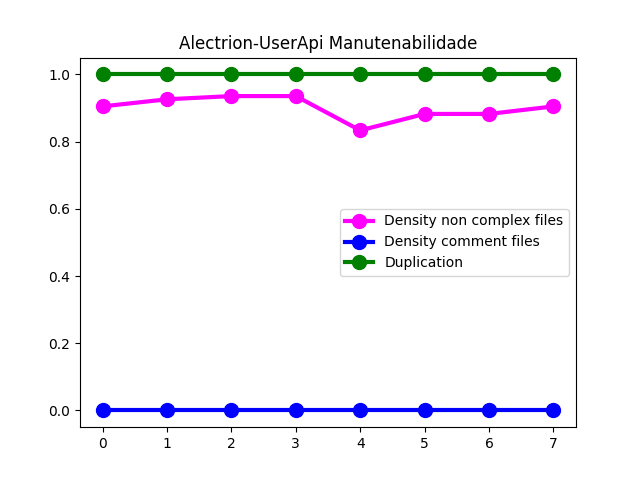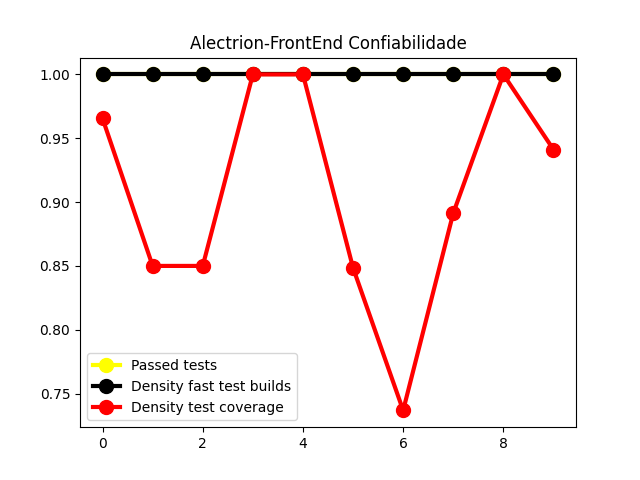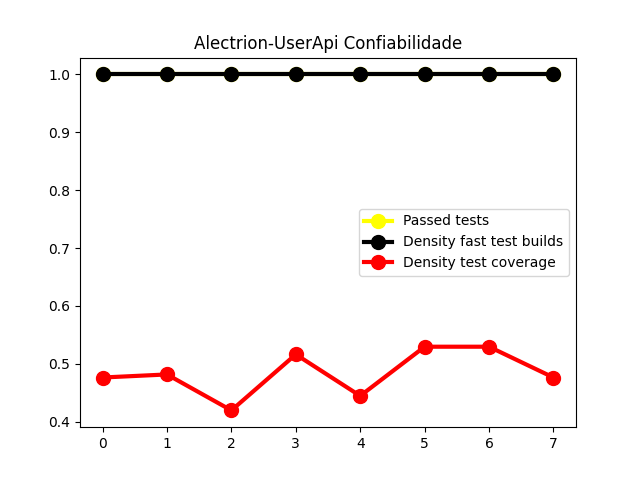